/tmp/ipykernel_61735/1489803853.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_numeric[col] = pd.to_numeric(data_numeric[col], errors='coerce')


Missing parties in the orientation dictionary: set()


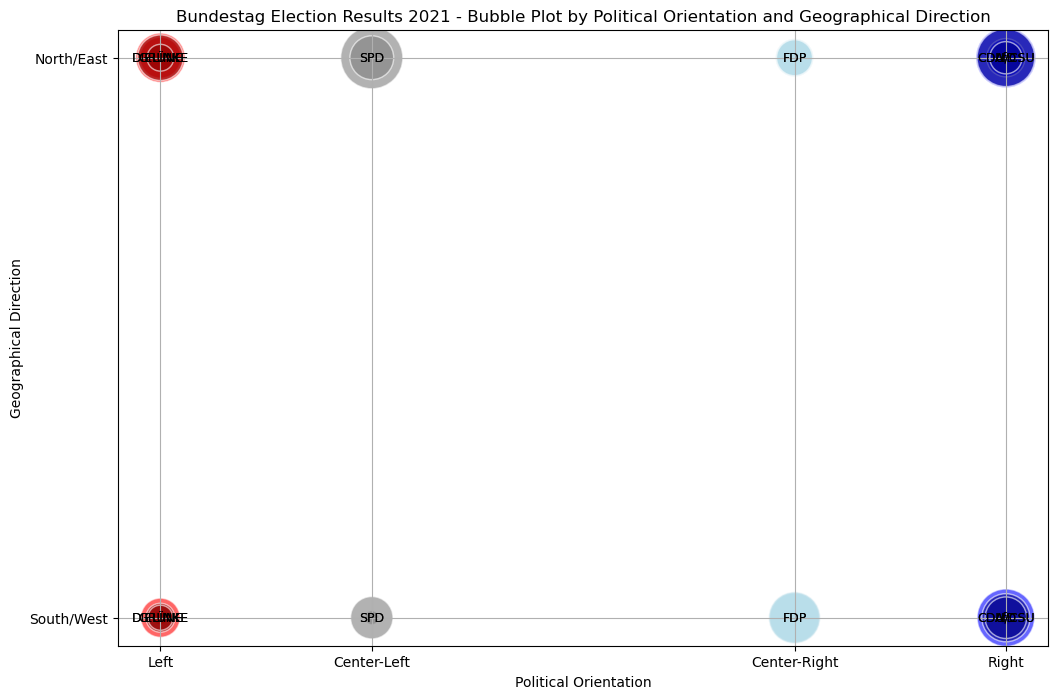

In [7]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset
file_path = './hdata1.csv'
data = pd.read_csv(file_path)

# Clean column names
data.columns = data.columns.str.strip()

# Define the geographical direction for each Bundesland
geographical_direction = {
    'Baden-Württemberg': 'South', 'Bayern': 'South', 'Berlin': 'East', 'Brandenburg': 'East',
    'Bremen': 'North', 'Hamburg': 'North', 'Hessen': 'West', 'Mecklenburg-Vorpommern': 'East',
    'Niedersachsen': 'North', 'Nordrhein-Westfalen': 'West', 'Rheinland-Pfalz': 'West',
    'Saarland': 'West', 'Sachsen': 'East', 'Sachsen-Anhalt': 'East', 'Schleswig-Holstein': 'North',
    'Thüringen': 'East'
}

# Assign geographical direction to the data
data['Geographical_Direction'] = data['Bundesland'].map(geographical_direction)

# Select only relevant columns (party votes) before aggregation
data_numeric = data[['Bundesland', 'CDU/CSU', 'SPD', 'GRÜNE', 'FDP', 'AfD', 'DIELINKE', 'Geographical_Direction']]

# Convert relevant columns to numeric (if not already)
for col in ['CDU/CSU', 'SPD', 'GRÜNE', 'FDP', 'AfD', 'DIELINKE']:
    data_numeric[col] = pd.to_numeric(data_numeric[col], errors='coerce')

# Aggregate votes by geographical direction
aggregated_data = data_numeric.groupby('Geographical_Direction').sum()

# Transform the data to long format for plotting
long_data = aggregated_data.reset_index().melt(id_vars='Geographical_Direction', var_name='Party', value_name='Votes')

# Exclude 'Bundesland' from party names
long_data = long_data[long_data['Party'] != 'Bundesland']

# Define political orientation and colors
party_orientation = {
    'CDU/CSU': ('right', 'blue'), 'SPD': ('center-left', 'grey'), 'GRÜNE': ('left', 'red'),
    'FDP': ('center-right', 'lightblue'), 'AfD': ('right', 'darkblue'), 'DIELINKE': ('left', 'darkred')
}

# Check for discrepancies in party names
missing_parties = set(long_data['Party'].unique()) - set(party_orientation.keys())
print(f"Missing parties in the orientation dictionary: {missing_parties}")

# Manually correct any discrepancies
long_data['Party'] = long_data['Party'].str.strip()

# Map political orientation and colors to the data
long_data['Orientation'] = long_data['Party'].map(lambda x: party_orientation[x][0])
long_data['Color'] = long_data['Party'].map(lambda x: party_orientation[x][1])

# Coordinates for plotting based on political orientation
orientation_coords = {
    'left': (-1, 0), 'center-left': (-0.5, 0), 'center-right': (0.5, 0), 'right': (1, 0)
}
long_data['X'] = long_data['Orientation'].map(lambda x: orientation_coords[x][0])
long_data['Y'] = long_data['Geographical_Direction'].map(lambda x: 1 if x in ['North', 'East'] else -1)

# Correct the palette by defining it as a dictionary
palette = {color: color for color in long_data['Color'].unique()}

# Plotting
plt.figure(figsize=(12, 8))
sns.scatterplot(data=long_data, x='X', y='Y', size='Votes', hue='Color', palette=palette,
                sizes=(100, 2000), legend=False, alpha=0.6)

# Add annotations
for index, row in long_data.iterrows():
    plt.text(row['X'], row['Y'], row['Party'], horizontalalignment='center', verticalalignment='center', fontsize=9)

plt.xlabel('Political Orientation')
plt.ylabel('Geographical Direction')
plt.title('Bundestag Election Results 2021 - Bubble Plot by Political Orientation and Geographical Direction')
plt.xticks([-1, -0.5, 0.5, 1], ['Left', 'Center-Left', 'Center-Right', 'Right'])
plt.yticks([-1, 1], ['South/West', 'North/East'])
plt.grid(True)

# Show plot
plt.show()


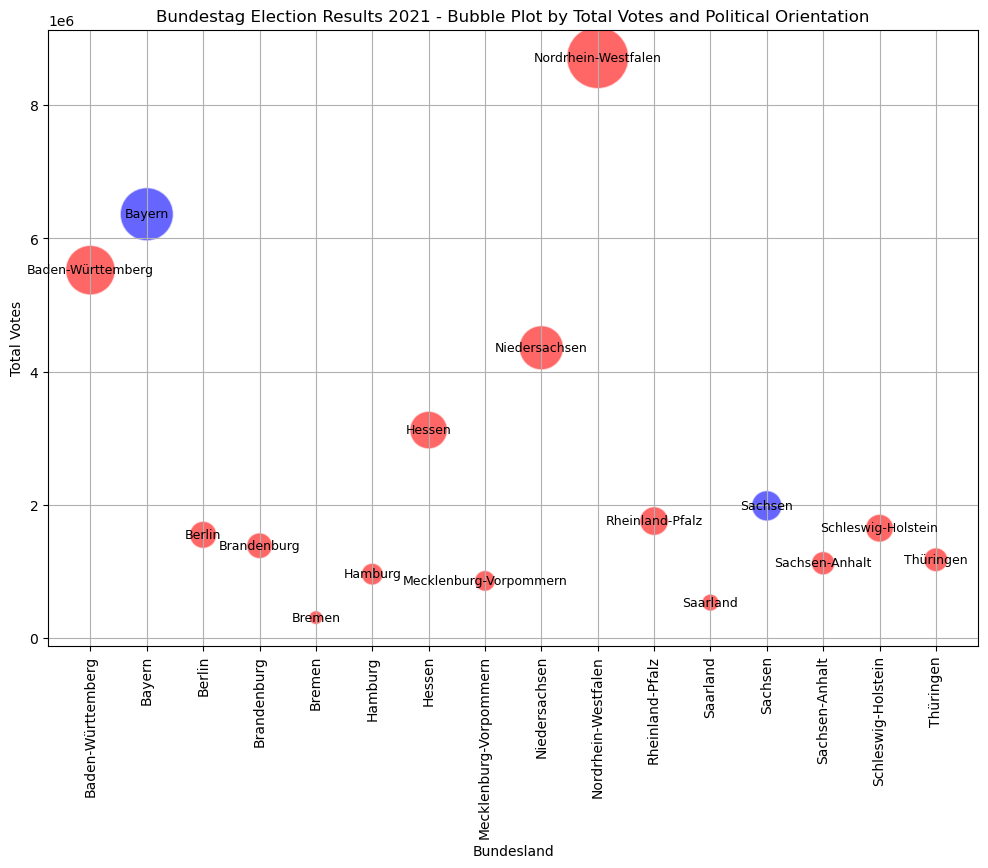

In [23]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset
file_path = './hdata1.csv'
data = pd.read_csv(file_path)

# Clean column names
data.columns = data.columns.str.strip()

# Ensure columns are treated as strings and remove periods from numeric columns
for col in ['CDU/CSU', 'SPD', 'GRÜNE', 'FDP', 'AfD', 'DIELINKE']:
    data[col] = data[col].astype(str).str.replace('.', '', regex=False).astype(float)

# Define right-leaning parties
right_parties = ['CDU/CSU', 'AfD']

# Calculate total votes and right-leaning votes
data['Total_Votes'] = data[['CDU/CSU', 'SPD', 'GRÜNE', 'FDP', 'AfD', 'DIELINKE']].sum(axis=1)
data['Right_Votes'] = data[right_parties].sum(axis=1)

# Determine bubble color based on more votes for right-leaning parties
data['Color'] = data['Right_Votes'] > (data['Total_Votes'] / 2)
data['Color'] = data['Color'].map({True: 'blue', False: 'red'})

# Plotting
plt.figure(figsize=(12, 8))
sns.scatterplot(data=data, x='Bundesland', y='Total_Votes', size='Total_Votes', hue='Color',
                sizes=(100, 2000), legend=False, alpha=0.6, palette=['red', 'blue'])

# Add annotations
for index, row in data.iterrows():
    plt.text(index, row['Total_Votes'], row['Bundesland'], horizontalalignment='center', verticalalignment='center', fontsize=9)

plt.xlabel('Bundesland')
plt.ylabel('Total Votes')
plt.title('Bundestag Election Results 2021 - Bubble Plot by Total Votes and Political Orientation')
plt.xticks(rotation=90)
plt.grid(True)

# Show plot
plt.show()



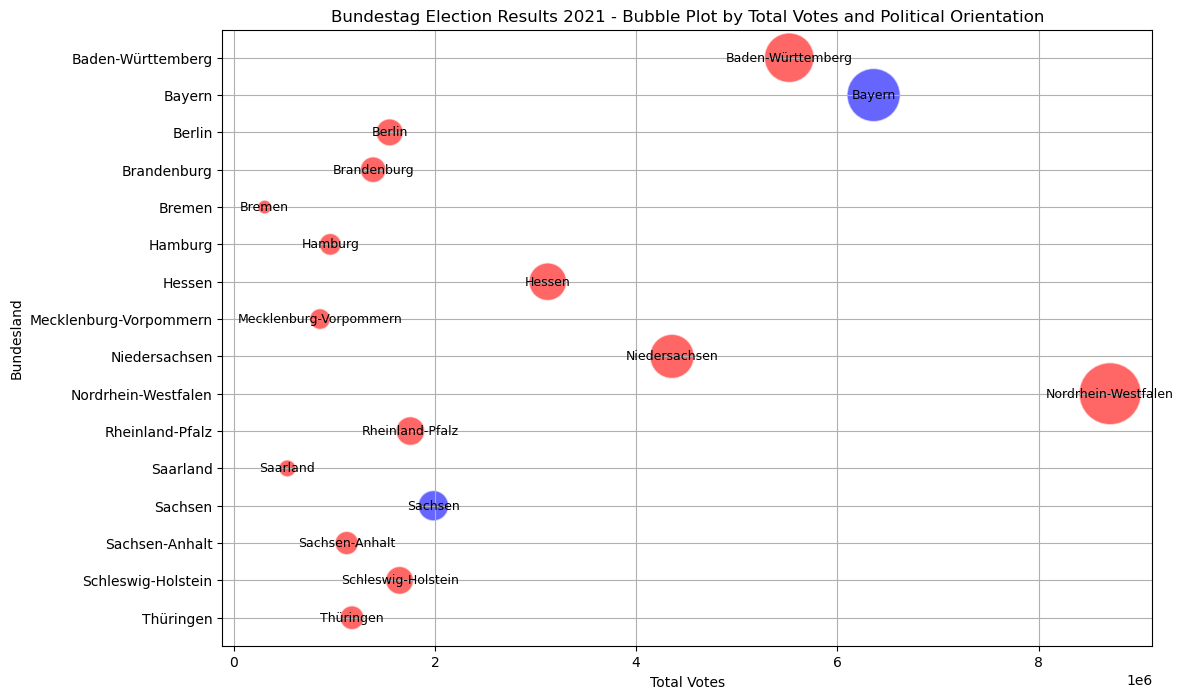

In [24]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset
file_path = './hdata1.csv'
data = pd.read_csv(file_path)

# Clean column names
data.columns = data.columns.str.strip()

# Ensure columns are treated as strings and remove periods from numeric columns
for col in ['CDU/CSU', 'SPD', 'GRÜNE', 'FDP', 'AfD', 'DIELINKE']:
    data[col] = data[col].astype(str).str.replace('.', '', regex=False).astype(float)

# Define right-leaning parties
right_parties = ['CDU/CSU', 'AfD']

# Calculate total votes and right-leaning votes
data['Total_Votes'] = data[['CDU/CSU', 'SPD', 'GRÜNE', 'FDP', 'AfD', 'DIELINKE']].sum(axis=1)
data['Right_Votes'] = data[right_parties].sum(axis=1)

# Determine bubble color based on more votes for right-leaning parties
data['Color'] = data['Right_Votes'] > (data['Total_Votes'] / 2)
data['Color'] = data['Color'].map({True: 'blue', False: 'red'})

# Plotting
plt.figure(figsize=(12, 8))
sns.scatterplot(data=data, x='Total_Votes', y='Bundesland', size='Total_Votes', hue='Color',
                sizes=(100, 2000), legend=False, alpha=0.6, palette=['red', 'blue'])

# Add annotations
for index, row in data.iterrows():
    plt.text(row['Total_Votes'], index, row['Bundesland'], horizontalalignment='center', verticalalignment='center', fontsize=9)

plt.ylabel('Bundesland')
plt.xlabel('Total Votes')
plt.title('Bundestag Election Results 2021 - Bubble Plot by Total Votes and Political Orientation')
plt.grid(True)

# Show plot
plt.show()


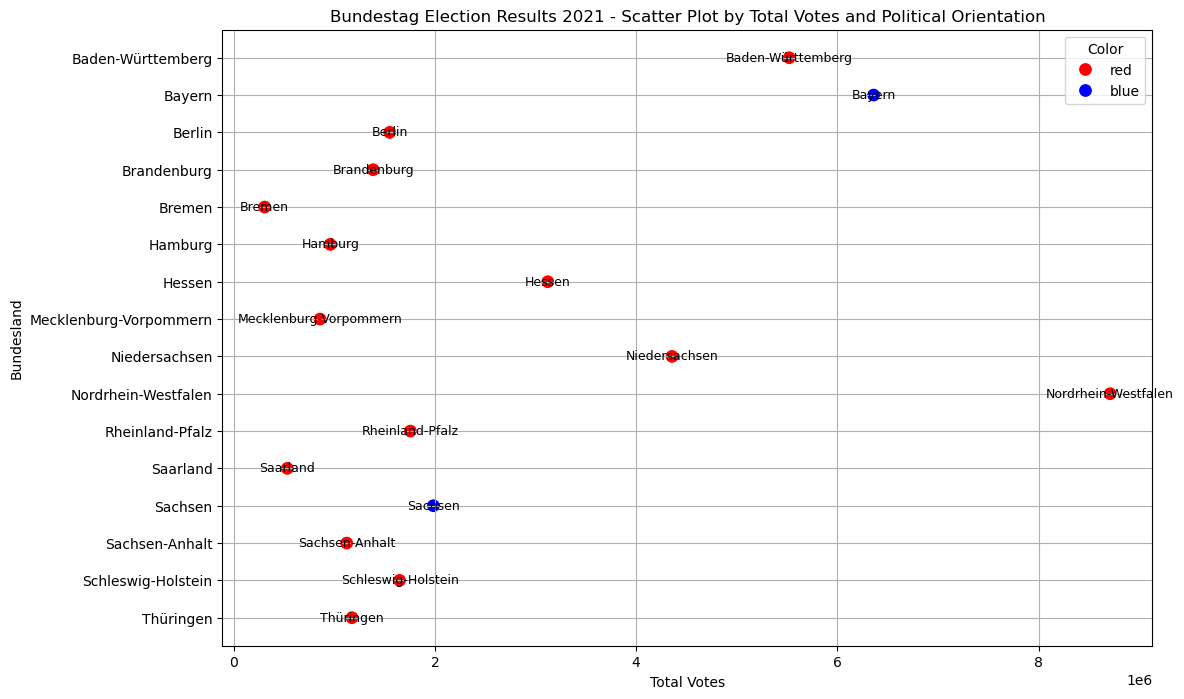

In [25]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset
file_path = './hdata1.csv'
data = pd.read_csv(file_path)

# Clean column names
data.columns = data.columns.str.strip()

# Ensure columns are treated as strings and remove periods from numeric columns
for col in ['CDU/CSU', 'SPD', 'GRÜNE', 'FDP', 'AfD', 'DIELINKE']:
    data[col] = data[col].astype(str).str.replace('.', '', regex=False).astype(float)

# Define right-leaning parties
right_parties = ['CDU/CSU', 'AfD']

# Calculate total votes and right-leaning votes
data['Total_Votes'] = data[['CDU/CSU', 'SPD', 'GRÜNE', 'FDP', 'AfD', 'DIELINKE']].sum(axis=1)
data['Right_Votes'] = data[right_parties].sum(axis=1)

# Determine bubble color based on more votes for right-leaning parties
data['Color'] = data['Right_Votes'] > (data['Total_Votes'] / 2)
data['Color'] = data['Color'].map({True: 'blue', False: 'red'})

# Plotting
plt.figure(figsize=(12, 8))
sns.scatterplot(data=data, x='Total_Votes', y='Bundesland', hue='Color', palette=['red', 'blue'], s=100)

# Add annotations
for index, row in data.iterrows():
    plt.text(row['Total_Votes'], index, row['Bundesland'], horizontalalignment='center', verticalalignment='center', fontsize=9)

plt.ylabel('Bundesland')
plt.xlabel('Total Votes')
plt.title('Bundestag Election Results 2021 - Scatter Plot by Total Votes and Political Orientation')
plt.grid(True)

# Show plot
plt.show()


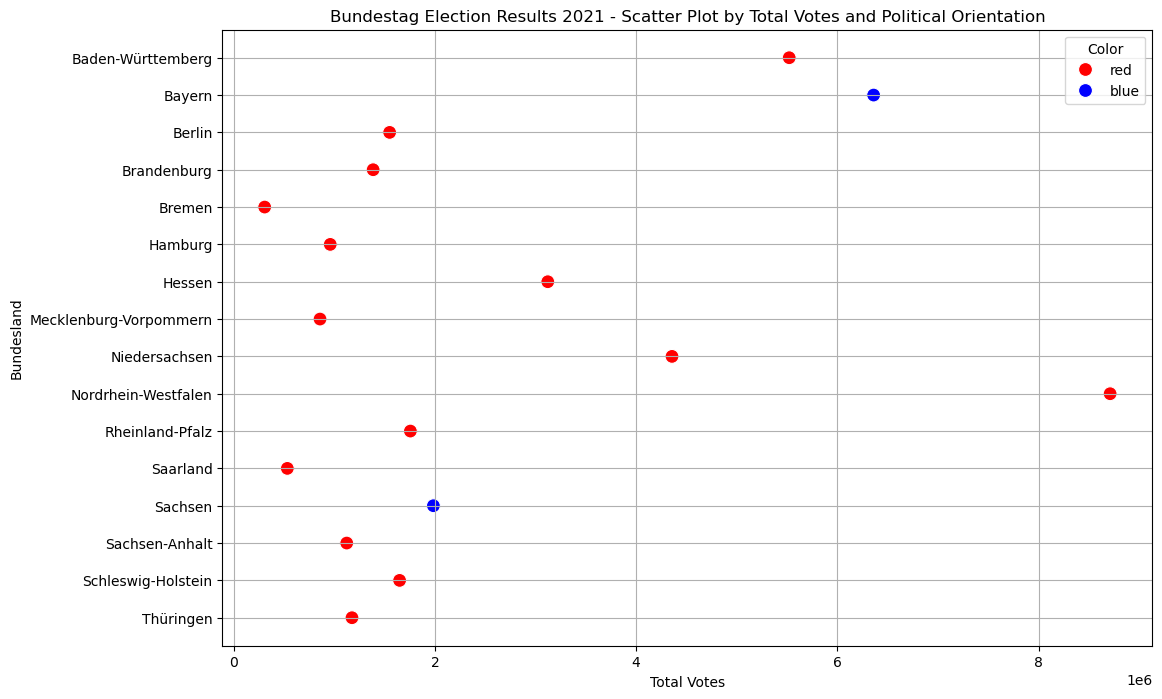

In [26]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset
file_path = './hdata1.csv'
data = pd.read_csv(file_path)

# Clean column names
data.columns = data.columns.str.strip()

# Ensure columns are treated as strings and remove periods from numeric columns
for col in ['CDU/CSU', 'SPD', 'GRÜNE', 'FDP', 'AfD', 'DIELINKE']:
    data[col] = data[col].astype(str).str.replace('.', '', regex=False).astype(float)

# Define right-leaning parties
right_parties = ['CDU/CSU', 'AfD']

# Calculate total votes and right-leaning votes
data['Total_Votes'] = data[['CDU/CSU', 'SPD', 'GRÜNE', 'FDP', 'AfD', 'DIELINKE']].sum(axis=1)
data['Right_Votes'] = data[right_parties].sum(axis=1)

# Determine bubble color based on more votes for right-leaning parties
data['Color'] = data['Right_Votes'] > (data['Total_Votes'] / 2)
data['Color'] = data['Color'].map({True: 'blue', False: 'red'})

# Plotting
plt.figure(figsize=(12, 8))
sns.scatterplot(data=data, x='Total_Votes', y='Bundesland', hue='Color', palette=['red', 'blue'], s=100)

plt.ylabel('Bundesland')
plt.xlabel('Total Votes')
plt.title('Bundestag Election Results 2021 - Scatter Plot by Total Votes and Political Orientation')
plt.grid(True)

# Show plot
plt.show()

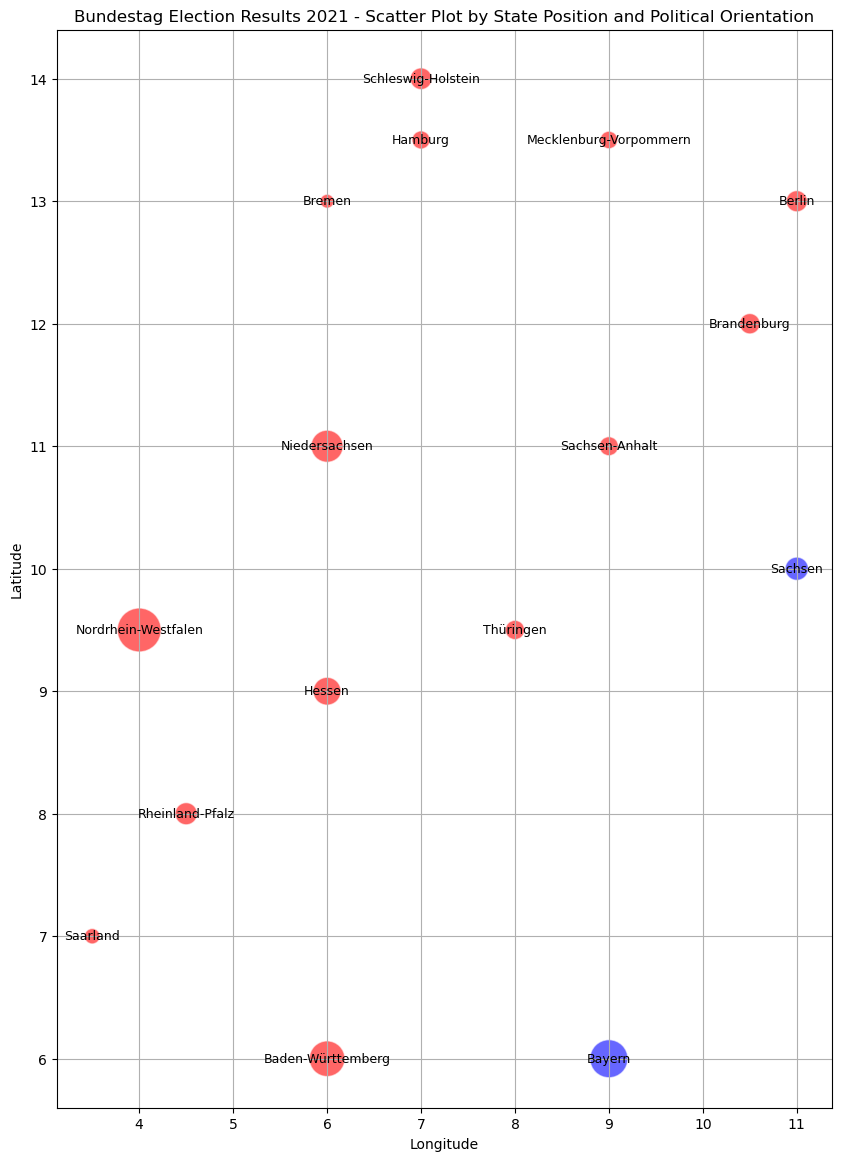

In [35]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset
file_path = './hdata1.csv'
data = pd.read_csv(file_path)

# Clean column names
data.columns = data.columns.str.strip()

# Ensure columns are treated as strings and remove periods from numeric columns
for col in ['CDU/CSU', 'SPD', 'GRÜNE', 'FDP', 'AfD', 'DIELINKE']:
    data[col] = data[col].astype(str).str.replace('.', '', regex=False).astype(float)

# Define approximate coordinates for each state based on the Germany map
coordinates = {
    'Schleswig-Holstein': (7, 14),
    'Hamburg': (7.0, 13.5),
    'Bremen': (6.0, 13),
    'Niedersachsen': (6, 11),
    'Mecklenburg-Vorpommern': (9, 13.5),
    'Nordrhein-Westfalen': (4, 9.5),
    'Rheinland-Pfalz': (4.5, 8),
    'Saarland': (3.5, 7),
    'Hessen': (6, 9),
    'Berlin': (11, 13),
    'Brandenburg': (10.5, 12),
    'Sachsen': (11, 10),
    'Sachsen-Anhalt': (9, 11),
    'Thüringen': (8, 9.5),
    'Bayern': (9, 6),
    'Baden-Württemberg': (6, 6)
}

# Add coordinates to the data
data['Coordinates'] = data['Bundesland'].map(coordinates)
data[['X', 'Y']] = pd.DataFrame(data['Coordinates'].tolist(), index=data.index)

# Define right-leaning parties
right_parties = ['CDU/CSU', 'AfD']

# Calculate total votes and right-leaning votes
data['Total_Votes'] = data[['CDU/CSU', 'SPD', 'GRÜNE', 'FDP', 'AfD', 'DIELINKE']].sum(axis=1)
data['Right_Votes'] = data[right_parties].sum(axis=1)

# Determine bubble color based on more votes for right-leaning parties
data['Color'] = data['Right_Votes'] > (data['Total_Votes'] / 2)
data['Color'] = data['Color'].map({True: 'blue', False: 'red'})

# Plotting
plt.figure(figsize=(10, 14))
sns.scatterplot(data=data, x='X', y='Y', hue='Color', palette=['red', 'blue'], size='Total_Votes', sizes=(100, 1000), legend=False, alpha=0.6)

# Add state names as annotations
for index, row in data.iterrows():
    plt.text(row['X'], row['Y'], row['Bundesland'], horizontalalignment='center', verticalalignment='center', fontsize=9)

plt.ylabel('Latitude')
plt.xlabel('Longitude')
plt.title('Bundestag Election Results 2021 - Scatter Plot by State Position and Political Orientation')
plt.grid(True)

# Show plot
plt.show()


/tmp/ipykernel_61735/4283704068.py:42: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  barplot = sns.barplot(x=region_data.index, y=region_data['Total_Votes'], palette=region_data['Color'].to_dict())


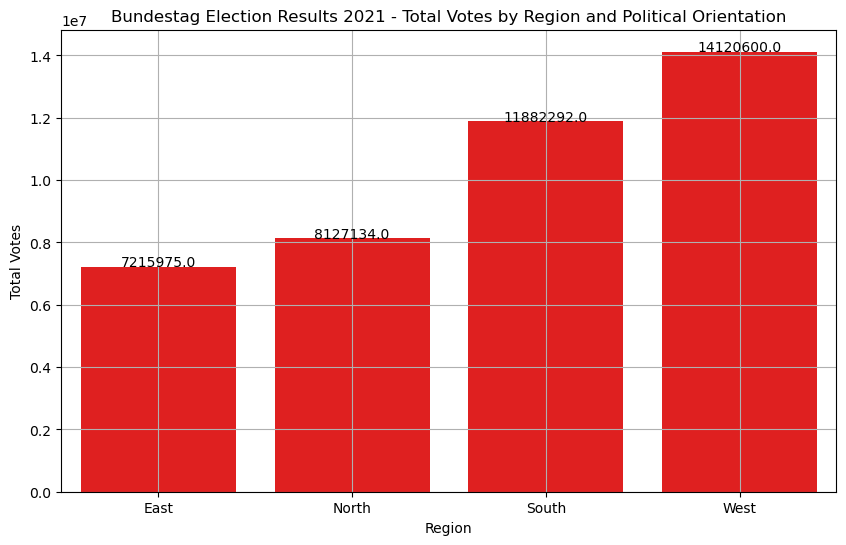

In [27]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset
file_path = './hdata1.csv'
data = pd.read_csv(file_path)

# Clean column names
data.columns = data.columns.str.strip()

# Ensure columns are treated as strings and remove periods from numeric columns
for col in ['CDU/CSU', 'SPD', 'GRÜNE', 'FDP', 'AfD', 'DIELINKE']:
    data[col] = data[col].astype(str).str.replace('.', '', regex=False).astype(float)

# Define right-leaning parties
right_parties = ['CDU/CSU', 'AfD']

# Calculate total votes and right-leaning votes
data['Total_Votes'] = data[['CDU/CSU', 'SPD', 'GRÜNE', 'FDP', 'AfD', 'DIELINKE']].sum(axis=1)
data['Right_Votes'] = data[right_parties].sum(axis=1)

# Determine the region for each state
regions = {
    'Schleswig-Holstein': 'North', 'Hamburg': 'North', 'Bremen': 'North', 'Niedersachsen': 'North', 'Mecklenburg-Vorpommern': 'North',
    'Nordrhein-Westfalen': 'West', 'Rheinland-Pfalz': 'West', 'Saarland': 'West', 'Hessen': 'West',
    'Berlin': 'East', 'Brandenburg': 'East', 'Sachsen': 'East', 'Sachsen-Anhalt': 'East', 'Thüringen': 'East',
    'Bayern': 'South', 'Baden-Württemberg': 'South'
}

data['Region'] = data['Bundesland'].map(regions)

# Aggregate votes by region
region_data = data.groupby('Region').sum()

# Determine bar color based on more votes for right-leaning parties
region_data['Color'] = region_data['Right_Votes'] > (region_data['Total_Votes'] / 2)
region_data['Color'] = region_data['Color'].map({True: 'blue', False: 'red'})

# Plotting
plt.figure(figsize=(10, 6))
barplot = sns.barplot(x=region_data.index, y=region_data['Total_Votes'], palette=region_data['Color'].to_dict())

# Add values on bars
for index, row in region_data.iterrows():
    barplot.text(index, row['Total_Votes'], round(row['Total_Votes'], 2), color='black', ha="center")

plt.xlabel('Region')
plt.ylabel('Total Votes')
plt.title('Bundestag Election Results 2021 - Total Votes by Region and Political Orientation')
plt.grid(True)

# Show plot
plt.show()


/tmp/ipykernel_61735/113154549.py:38: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  barplot = sns.barplot(x=region_data.index, y=region_data['Total_Votes'], palette=region_data['Color'].to_dict())


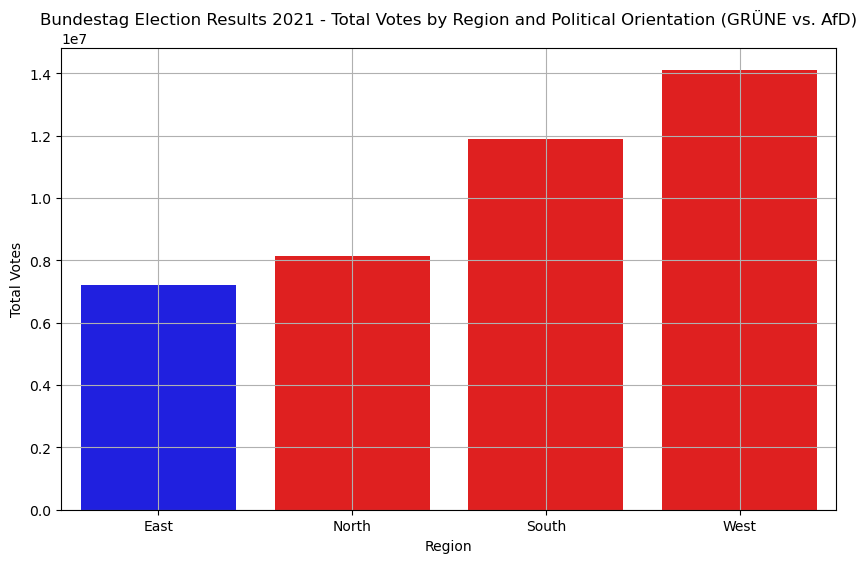

In [29]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset
file_path = './hdata1.csv'
data = pd.read_csv(file_path)

# Clean column names
data.columns = data.columns.str.strip()

# Ensure columns are treated as strings and remove periods from numeric columns
for col in ['CDU/CSU', 'SPD', 'GRÜNE', 'FDP', 'AfD', 'DIELINKE']:
    data[col] = data[col].astype(str).str.replace('.', '', regex=False).astype(float)

# Define regions
regions = {
    'Schleswig-Holstein': 'North', 'Hamburg': 'North', 'Bremen': 'North', 'Niedersachsen': 'North', 'Mecklenburg-Vorpommern': 'North',
    'Nordrhein-Westfalen': 'West', 'Rheinland-Pfalz': 'West', 'Saarland': 'West', 'Hessen': 'West',
    'Berlin': 'East', 'Brandenburg': 'East', 'Sachsen': 'East', 'Sachsen-Anhalt': 'East', 'Thüringen': 'East',
    'Bayern': 'South', 'Baden-Württemberg': 'South'
}

data['Region'] = data['Bundesland'].map(regions)

# Calculate total votes and right-leaning votes
data['Total_Votes'] = data[['CDU/CSU', 'SPD', 'GRÜNE', 'FDP', 'AfD', 'DIELINKE']].sum(axis=1)

# Aggregate votes by region
region_data = data.groupby('Region').sum()

# Determine bar color based on more votes for GRÜNE than AfD
region_data['Color'] = region_data['GRÜNE'] > region_data['AfD']
region_data['Color'] = region_data['Color'].map({True: 'red', False: 'blue'})

# Plotting
plt.figure(figsize=(10, 6))
barplot = sns.barplot(x=region_data.index, y=region_data['Total_Votes'], palette=region_data['Color'].to_dict())

plt.xlabel('Region')
plt.ylabel('Total Votes')
plt.title('Bundestag Election Results 2021 - Total Votes by Region and Political Orientation (GRÜNE vs. AfD)')
plt.grid(True)

# Show plot
plt.show()
